# 1. Load packages
## Install Package

In [1]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /private/var/folders/np/hwhg0jcx7zz9x0zw92qd4rb00000gn/T/pip-req-build-k_o74kz7
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15503 sha256=ceb2451e668ec6d1f1528aa36b155d5f3def79294394ebe17c7c871be001c868
  Stored in directory: /private/var/folders/np/hwhg0jcx7zz9x0zw92qd4rb00000gn/T/pip-ephem-wheel-cache-thzbcace/wheels/50/f1/1c/089cebf505dc8e8f87f61a21a439652bc53e39ebb2c3f6767e
Successfully built google-images-download


## Import Packages

In [2]:
import torchvision.transforms as transforms
#from skimage.color import gray2rgb
#import numpy as np
import os
#import sys
#import json
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#import scipy
#from scipy.spatial import KDTree
#from torch.autograd import Variable
from google_images_download import google_images_download   #importing the library
from fnmatch import fnmatch
from skimage.transform import rescale, resize, downscale_local_mean
#from tqdm import tqdm
#import os 
#import sys

from matplotlib import offsetbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random

# 2. Downloading Images
Since this example is just a demo we will download images from google. We have selected a few materials catagories but you can use whatever catagories you like. You can also use your own images. 

In [3]:
def download_images_from_google(names, path, num=25, verbose=True):
    
    # instantiation of the class to download images
    response = google_images_download.googleimagesdownload()
    
    # converts the list to a string
    names = ''.join(str(i+',') for i in names)
    
    # creating list of arguments
    arguments = ({"keywords":names,
                  "limit":num,"print_urls":verbose,
                 "output_directory":path}) 
    
    #passing the arguments to the function
    paths = response.download(arguments)   


In [5]:
# Folder where files will be downloaded
path = './downloads/'

# Names of catagories to download
names = ['transmission electron microscopy', 'atomic force microscopy', 'optical microscopy', 'metals',
        'ceramics', 'polymers','semiconductors']


download_images_from_google(names, path)


Item no.: 1 --> Item name = transmission electron microscopy
Evaluating...
Starting Download...
Image URL: https://cdn.britannica.com/90/113690-004-CB552E7F/Transmission-electron-microscope.jpg
Completed Image ====> 1.transmission-electron-microscope.jpg
Image URL: https://warwick.ac.uk/fac/sci/physics/current/postgraduate/regs/mpagswarwick/ex5/techniques/structural/tem/tem_ed.jpg
Completed Image ====> 2.tem_ed.jpg
Image URL: https://www.ccber.ucsb.edu/sites/default/files/Electron_Microscope.jpg
Completed Image ====> 3.electron_microscope.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/STEM_fig.png/1200px-STEM_fig.png
Completed Image ====> 4.1200px-stem_fig.png
Image URL: https://www.news-medical.net/image.axd?picture=TEM%20schwann%20cell%20-%20Jose%20Luis%20Calvo%20_thumb%5B8%5D_thumb.jpg
Completed Image ====> 5.image.axd.jpg
Image URL: https://www.biosciencenotes.com/wp-content/uploads/2018/06/TEM6.jpg
Completed Image ====> 6.tem6.jpg
Image URL: https://www.

KeyboardInterrupt: 

In [6]:
def image_collection(path, pattern = "*.jpg"):
    
    #Create a directory of all file paths
    dir_jpg=[]
    for path, subdirs, files in os.walk(path):
        for name in files:
            if fnmatch(name, pattern):
                file_path=os.path.normpath(os.path.join(path,name))
                dir_jpg.append(file_path)
    dir_jpg.sort()
    
    # saves images as a numpy array
    images_=[]
    for i in range(len(dir_jpg)):
        im = Image.open(dir_jpg[i])
        images_.append(im)
        
    dir_name=[]
    name_all=[]
    for ind, name in enumerate(dir_jpg):
        path, name = os.path.split(dir_jpg[ind])
        name = name.split('/')[-1][:-4].lower()
        dir_name.append(name[:2])
        name_all.append(name)
        
    return images_, dir_jpg, name_all, dir_name

In [7]:
path = './downloads/'
images, dir_jpg, name_all, dir_name = image_collection(path)

In [8]:
class image_dataset(Dataset):
    
    'Characterizes a dataset for PyTorch'
    def __init__(self, images, transform=None, viz=None):
        'Initialization'
        self.images = images
        self.transform = transform
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.images)
    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        image = self.images[index].convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image
    
    def __getitemviz__(self, index):
        'Generates one sample of data'
        # Select sample
        image = self.images[index].convert('RGB')

        image = viz_trans(image)
        
        return image
    

# way to deal with gray images. 
transform = transforms.Compose([
            #transforms.ToPILImage(),
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])

# way to deal with gray images. 
viz_trans = transforms.Compose([
            #transforms.ToPILImage(),
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])

In [9]:
batch_size = 5
cropped_dataset = image_dataset(images=images, transform=transform, viz=viz_trans)
train_dl = DataLoader(cropped_dataset, batch_size, shuffle=False, num_workers=0, pin_memory=True)

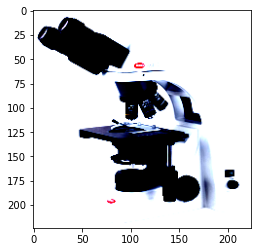

In [25]:
# Visualize a random input into the neural network
# Note the input into the neural network has been scaled

ind = np.random.randint(0,len(cropped_dataset))
plt.imshow(np.fliplr(np.rot90(torch.transpose(cropped_dataset.__getitem__(ind),0,2),k=3)))

In [30]:
# Set the parameters and CUDA, CPU useage
# Make this into a function

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}

# Create the Function that allows users to select the model as feature extractor (VGG16, ResNet34, or both)

In [31]:
import select_model as s_m

In [32]:
#TODO add verbose
# TODO add tqmd
test_vgg = s_m.select_model(train_dl,5,images,model_type='vgg', N_EPOCHS=5)

Using cache found in /Users/joshuaagar/.cache/torch/hub/pytorch_vision_v0.6.0


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
(138, 4096)


## 5. Plot UMAP

In [33]:
#Plotting method



def imscatter(x, y, images, number_images_shown, ax=None, zoom=1.0 ):
        if ax is None:
            ax = plt.gca()
        x, y = np.atleast_1d(x, y)
        artists = []
        
        shown_images=[]
        x1=[]
        y1=[]

        r= random.sample(range(len(images)),number_images_shown)
        r.sort()
        for i in r:
            
            shown_images.append(images[i])
            x1.append(x[i])
            y1.append(y[i])
            
        for x0, y0, img0 in zip (x1, y1, shown_images):
            im = OffsetImage(np.fliplr(np.rot90(img0[:,:,:],k=3)).astype(np.uint8), zoom=zoom)
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False, pad=0)
            artists.append(ax.add_artist(ab))
        ax.update_datalim(np.column_stack([x, y]))
        ax.autoscale()
        return artists

def plot_embedding(X, number_images_shown, size, imgs):
        #Reset to limit of axes to [0,1]
        x_min, x_max = np.min(X, 0), np.max(X, 0)
        X = ((X - x_min) / (x_max - x_min))*size

        plt.figure(figsize=(size, size))
        plt.rcParams['savefig.facecolor'] = "0"
        plt.rcParams['figure.facecolor'] = "1"
                    
        ax = plt.subplot(111, frameon=False)
        #ax.axis("off")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        if hasattr(offsetbox, 'AnnotationBbox'):
            imscatter(X[:, 0],  X[:, 1], imgs,  number_images_shown, zoom=0.1, ax=ax)
        
        plt.xlim(np.min(X[:,0]),np.max(X[:,0]))
        plt.ylim(np.min(X[:,1]),np.max(X[:,1]))
      
        plt.tight_layout(pad=0,h_pad=0,w_pad=0)
        plt.savefig("test1.png", bbox_inches='tight', pad_inches=0, dpi=300)

#         if title is not None:
#             plt.title(title)

# 6. Run UMAP

In [34]:
#Save the images data for UMAP plotting later

images =[]
for i in range(len(cropped_dataset)):
    images.append(torch.transpose(cropped_dataset.__getitemviz__(i),0,2).detach().numpy())

images = np.array(images)
    

In [35]:
np.save('Data_images.npy',images) #save images
np.save('Data_name_all.npy',name_all) # saves the files with the names

In [36]:
np.save('Data_activations.npy',test_vgg) #save activations

In [37]:
!pip install umap-learn

In [38]:
# Calcualte UMAP activations
import umap.umap_ as umap
import time

start = time.time()
print("Computing UMAP embedding")
np.random.seed(42)
X_umap = umap.UMAP(n_neighbors=5,min_dist=0.3, n_components=2, metric='correlation').fit_transform(test_vgg)
    
# plot_embedding(X_umap, 1000, images, 'UMAP embedding of' +' {} '.format(X_umap.shape[0]) +'images'+" (1000 images shown)")
    #plt.savefig(filename, bbox_inches='tight', dpi=300)
# plot_embedding(X_umap, X_umap.shape[0], 10, images)    
stop = time.time() #end the timer

print(stop-start)

Computing UMAP embedding
6.424667835235596


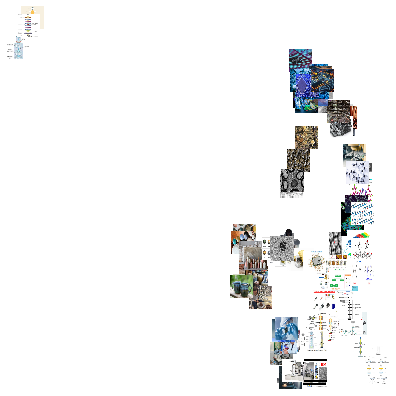

In [39]:
# Plot UMAP
plot_embedding(X_umap, 100, 5, images*255)    

In [40]:
np.save('Data_umap.npy',X_umap) #save UMAP activations